<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-KevinBCruzMejia/blob/main/TecMty_Regresion_lineal_polinomial_A01794176.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###Profesora: Dra. María de la Paz Rico Fernández
####Fecha: 09/11/2022
## **Adtividad de la Semana 7**
###**Notebook 1. Regresión. **

**Nombre y matrícula del estudiante:**

*   Kevin Brandon Cruz Mejia - A01794176

**Link:**
* https://github.com/PosgradoMNA/actividades-de-aprendizaje-KevinBCruzMejia/blob/main/TecMty_Regresion_lineal_polinomial_A01794176.ipynb

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

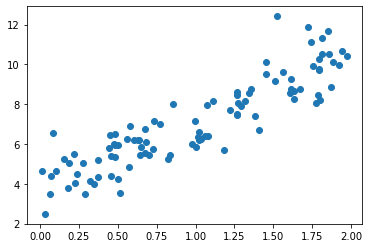

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

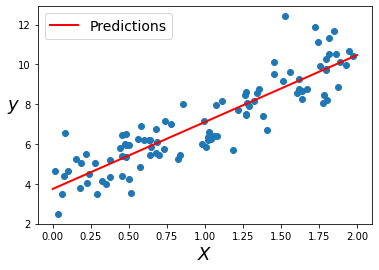

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

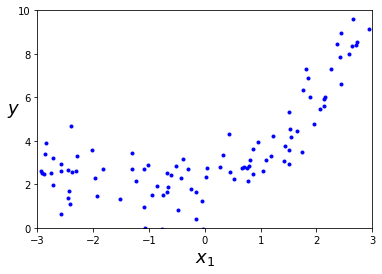

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

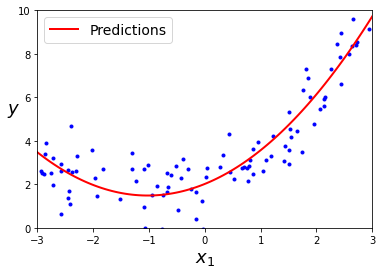

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 800
Tamaño de X_train: (800, 1)
**************************************************
Mumero total de registros en el test dataset: 200
Tamaño del X_test: (200, 1)


In [26]:
len(X_train)

800

In [27]:
y_train.describe

<bound method NDFrame.describe of 423    44.142815
157    46.579918
670    38.107937
256    45.324395
965    29.518772
         ...    
575    48.512880
838    31.132853
337    28.023576
523    38.219681
863    31.549470
Name: Manufacturing Cost, Length: 800, dtype: float64>

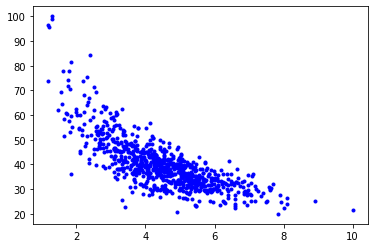

In [28]:
plt.plot(X_train,y_train,'b.')

## Simple Linear Regression

Simple linear regression equation accordance previous plot with negative slope:

$y = -ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

In [29]:
#lineal
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

Plot the model's predictions:

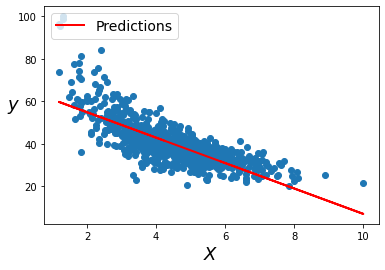

In [30]:
# construct best fit line
#X_fit = np.linspace(0, 2, 100)
y_pred = linear_reg.predict(X_train)

plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [31]:
linear_reg.intercept_, linear_reg.coef_

(66.79997932683362, array([-5.97912772]))

The model estimates:

$\hat{y} = -5.98X + 66.80$

In [32]:
from sklearn import metrics
from sklearn.metrics import r2_score
nombre_lineal, resultado_lineal = list(), list()
nombre_lineal.append('MAE')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
resultado_lineal.append(metrics.mean_absolute_error(y_train, y_pred))
nombre_lineal.append('Root Mean Squared Error:')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
resultado_lineal.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
nombre_lineal.append('r2_score')
print('r2_score',r2_score(y_train, y_pred))
resultado_lineal.append(r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.885796539672615
Root Mean Squared Error: 6.8220153911183425
r2_score 0.5741612020971557


Caso Polinomial 
Como en el database tenemos diferentes ecuaciones que interpreten su comportamiento en la solucion se especificara la ecuacion que mejor desempeño tenga por ejemplo:

$y = X^2 + X + b + noise$

In [33]:
#polinomial
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

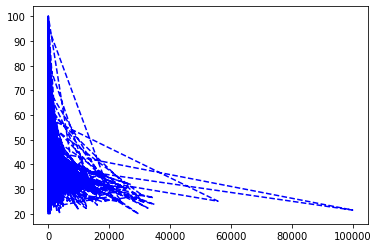

In [34]:
plt.plot(X_poly,y_train,'b--')

Fit the model to this extended training data:

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y_train)


LinearRegression()

Plot the data and the predictions:

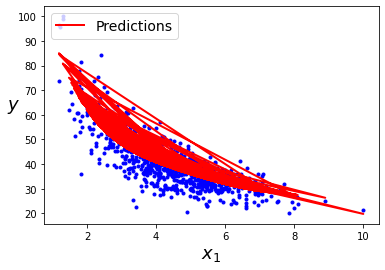

In [36]:
#X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_train)
y_pred = lin_reg.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_train, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
#plt.axis([-3, 3, 0, 10]);

In [37]:
np.round(lin_reg.coef_,2), lin_reg.intercept_

(array([-8.843e+01,  2.880e+01, -4.950e+00,  4.200e-01, -1.000e-02]),
 156.8176710580701)

The model estimates:

$\hat{y} = -0.01X^5 + 0.42X^4 + -4.95X^3 + 28.80X^2 - 88.43X + 156.81$

In [38]:
from sklearn import metrics
from sklearn.metrics import r2_score

nombre_polinomial, resultado_polinomial = list(), list()
nombre_polinomial.append('MAE')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
resultado_polinomial.append(metrics.mean_absolute_error(y_train, y_pred))
nombre_polinomial.append('Root Mean Squared Error:')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
resultado_polinomial.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
nombre_polinomial.append('r2_score')
print('r2_score',r2_score(y_train, y_pred))
resultado_polinomial.append(r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.445317842045028
Root Mean Squared Error: 5.923606400651761
r2_score 0.6789355469744379


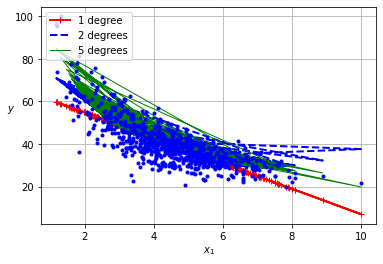

In [39]:
# extra code – this cell generates and saves Figure 4–14

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


poly_features = PolynomialFeatures(degree=1, include_bias=False)
X_new = poly_features.fit_transform(X_train)
X_new2 = poly_features.fit_transform(X_test)

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 5)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X_new, y_train)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X_train, y_train, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
#plt.axis([-500, 500, -100, 100])
plt.grid()
#save_fig("high_degree_polynomials_plot")
plt.show()

### Ridge Regression or L<sub>2</sub> Regularization 

It is important to **scale** the data before performing Ridge Regression:

In [40]:
# better 
from sklearn.pipeline import Pipeline

model = Pipeline([("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [41]:
y_pred = model.predict(X_train)

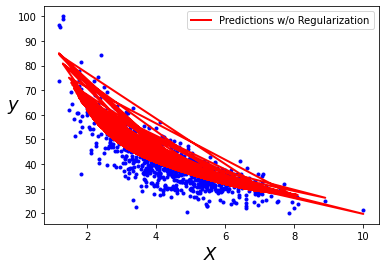

In [42]:
plt.plot(X_train, y_train, "b.")
plt.plot(X_train, y_pred, "r-", linewidth=2, label="Predictions w/o Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [43]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.445317842044342
Root Mean Squared Error: 5.923606400651763
r2_score 0.6789355469744378


Add Ridge Regularization to the model:

In [44]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 0.0001, solver = 'cholesky', random_state = 42))])
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge',
                 Ridge(alpha=0.0001, random_state=42, solver='cholesky'))])

In [45]:
y_pred = model_ridge.predict(X_train)

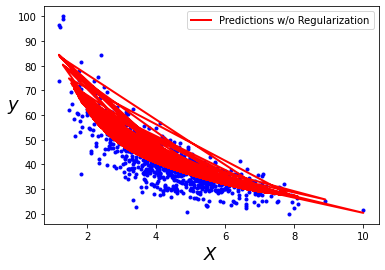

In [46]:
plt.plot(X_train, y_train, "b.")
plt.plot(X_train, y_pred, "r-", linewidth=2, label="Predictions w/o Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

Obtener ecuacion

In [47]:
np.round(model_ridge["ridge"].coef_,2), model_ridge["ridge"].intercept_

(array([-108.83,  322.9 , -430.51,  282.37,  -74.71]), 40.0531584478626)

The model estimates:

$\hat{y} = -74.71X^5 + 282.37X^4 - 430.51X^3 + 322.9X^2 - 108.83X + 40.05$

In [48]:
nombre_polinomial_ridge, resultado_polinomial_ridge = list(), list()
nombre_polinomial_ridge.append('MAE')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
resultado_polinomial_ridge.append(metrics.mean_absolute_error(y_train, y_pred))
nombre_polinomial_ridge.append('Root Mean Squared Error:')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
resultado_polinomial_ridge.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
nombre_polinomial_ridge.append('r2_score')
print('r2_score',r2_score(y_train, y_pred))
resultado_polinomial_ridge.append(r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.4453837029043015
Root Mean Squared Error: 5.924183362837506
r2_score 0.6788730002563118


### Lasso Regression  or L<sub>1</sub> Regularization 

In [49]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 0.06, random_state = 15))])
model_lasso.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.06, random_state=15))])

In [50]:
y_pred = model_lasso.predict(X_train)

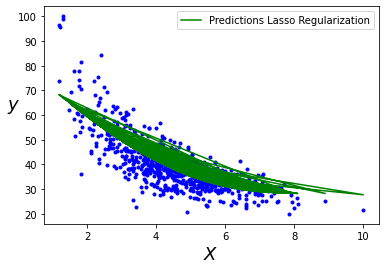

In [51]:
plt.plot(X_train, y_train, "b.")
plt.plot(X_train, y_pred, "g-",label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

Obtener ecuacion

In [52]:
model_lasso["lasso"].coef_ , model_lasso["lasso"].intercept_

(array([-15.44972108,   0.        ,  10.36660656,   0.        ,
         -2.63398772]), 40.05315844786254)

The model estimates:

$\hat{y} = -2.63X^5  + 10.36X^3 - 15.44X + 40.05$

In [53]:
nombre_polinomial_lasso, resultado_polinomial_lasso = list(), list()
nombre_polinomial_lasso.append('MAE')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
resultado_polinomial_lasso.append(metrics.mean_absolute_error(y_train, y_pred))
nombre_polinomial_lasso.append('Root Mean Squared Error:')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
resultado_polinomial_lasso.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
nombre_polinomial_lasso.append('r2_score')
print('r2_score',r2_score(y_train, y_pred))
resultado_polinomial_lasso.append(r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.528623956735011
Root Mean Squared Error: 6.195188961598781
r2_score 0.6488206647693238


## Grafica de los errores

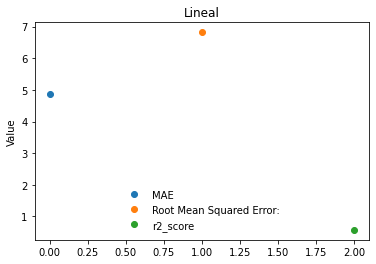

In [54]:
fig, ax = plt.subplots()
plt.title('Lineal');
plt.ylabel('Value')
for i in range(len(resultado_lineal)):
  ax.plot(i,resultado_lineal[i], 'o', label=nombre_lineal[i])
  leg = ax.legend();
  ax.legend(loc='lower center', frameon=False)

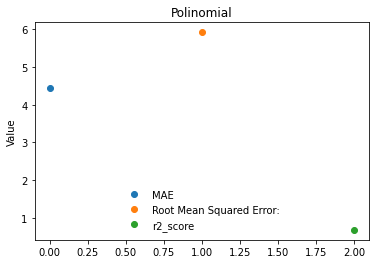

In [55]:
fig, ax = plt.subplots()
plt.ylabel('Value')
plt.title('Polinomial');
for i in range(len(resultado_polinomial)):
  ax.plot(i,resultado_polinomial[i], 'o', label=nombre_polinomial[i])
  leg = ax.legend();
  ax.legend(loc='lower center', frameon=False)

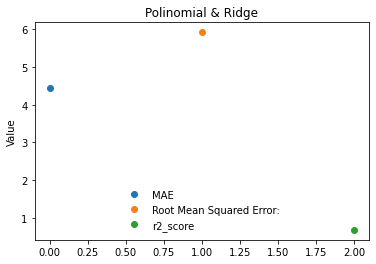

In [56]:
fig, ax = plt.subplots()
plt.title('Polinomial & Ridge');
plt.ylabel('Value')
for i in range(len(resultado_polinomial_ridge)):
  ax.plot(i,resultado_polinomial_ridge[i], 'o', label=nombre_polinomial_ridge[i])
  leg = ax.legend();
  ax.legend(loc='lower center', frameon=False)

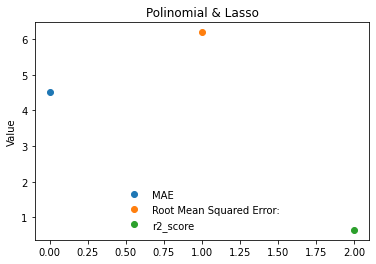

In [57]:
fig, ax = plt.subplots()
plt.ylabel('Value')
plt.title('Polinomial & Lasso');
for i in range(len(resultado_polinomial_lasso)):
  ax.plot(i,resultado_polinomial_lasso[i], 'o', label=nombre_polinomial_lasso[i])
  leg = ax.legend();
  ax.legend(loc='lower center', frameon=False)

##Explica tus resultados

* Que método conviene más a la empresa, ¿por que?, 
  * R. El metodo minimo que le conviene mejor a la empresa es el polinomial y si requiere mejorar el modelo seria el metodo polinomial con lasso, porque al realizar los ejercicios anteriores el MAE $R^2$, se aprecia que el error es menor a los anteriores metodos con la observacion que el Lasso tiene sus hiperparametros que se requiere modificar para mejorar el modelo
* ¿que porcentajes de entrenamiento y evaluación usaste?, 
  * Utilice el 80% de entrenamiento y 20% de evaluacion porqur influia en el error obtenido
* ¿que error tienes?
  * El error que tengo cambia dependiendo si se ocupa todo el dataframe o solo el data training, siguiendo las buenas practicas se debe ocupar el training para entrenar el modelo y el restante para saber el score de la prediccion del modelo, el error RMS es mas alto que el MAE, mientras que el $R^2$ es el mas bajo, con el metodo polinomial el 
     * Error medio Absoluto (MAE): 4.445317842044342
     * Root Mean Squared Error: 5.923606400651763
     * r2_score 0.6789355469744378
  * Esto con un grado de 5, al agregar Lasso se obtiene MAE y RME un poco mas alto pero un r2_score 0.6488206647693238, con Ridge se tiene casi similar      
     * Error medio Absoluto (MAE): 4.4453837029043015
     * Root Mean Squared Error: 5.924183362837506
     * r2_score 0.6788730002563118 
* ¿es bueno?
    * Con el metodo polinomial se obtiene un buen modelo porque los erorres son menores con un grado 5, y es aceptable, mientras que con los metodos de regularizacion la diferencia es minima 
* ¿cómo lo sabes?
    * Porque al realizar varias combinaciones el error es de los mas bajos, ademas que al añadir los metodos de Regularizacion no tiene una gran diferencia, la diferencia se nota en los coeficientes de la ecuacion ya que el intercept se mantiene igual


#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20772,1972200428,20140625T000000,563500.0,3,2.50,1400,1312,3.5,0,0,...,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21528,3416600750,20150217T000000,585000.0,3,2.50,1750,1381,3.0,0,0,...,8,1750,0,2008,0,98122,47.6021,-122.294,1940,4800
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19947,1776460110,20141223T000000,395000.0,4,2.75,2280,5013,2.0,0,0,...,8,2280,0,2009,0,98019,47.7333,-121.976,2130,5121


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [60]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [61]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


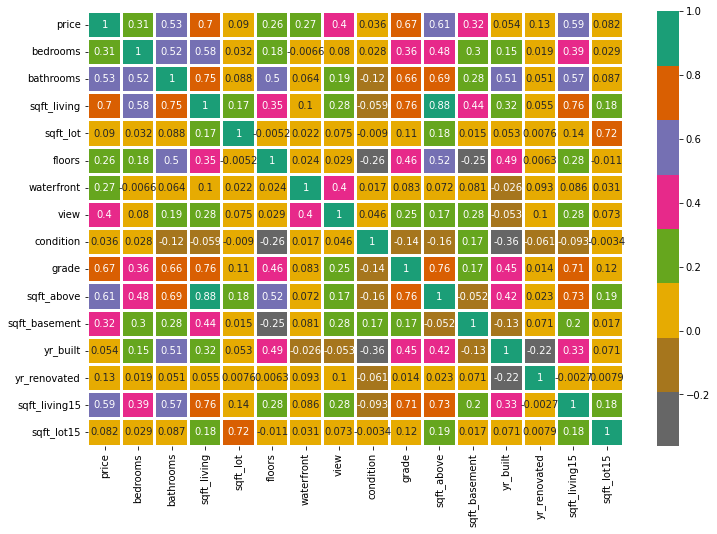

In [62]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [63]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 17290
Tamaño de X_train: (17290, 15)
**************************************************
Mumero total de registros en el test dataset: 4323
Tamaño del X_test: (4323, 15)


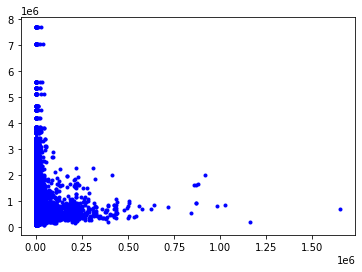

In [65]:
#tu codigo aquí
plt.plot(X_train,y_train,'b.')

## Simple Linear Regression

Simple linear regression equation accordance previous plot with negative slope:

$y = -ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

In [66]:
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
y_train_scaled = scaled.fit_transform(y_train)
#lineal
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train_scaled, y_train_scaled)

LinearRegression()

Plot the model's predictions:

In [67]:
# construct best fit line
#X_fit = np.linspace(0, 2, 100)
y_pred = linear_reg.predict(X_train_scaled)

In [68]:
y_pred.shape

(17290, 1)

In [69]:
X_train_scaled.shape

(17290, 15)

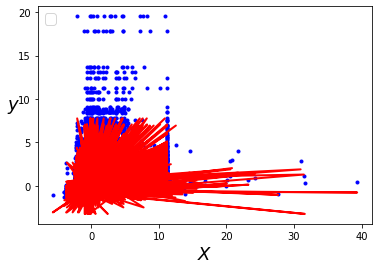

In [70]:


#plt.scatter(np.ravel(X_train), np.ravel(y_train))
plt.plot(X_train_scaled,y_train_scaled,'b.')
plt.plot(X_train_scaled, y_pred, "r-", linewidth=2)#, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [71]:
linear_reg.intercept_, linear_reg.coef_

(array([-8.9030532e-16]),
 array([[-0.09487263,  0.08443032,  0.20598472,  0.00299923,  0.04350148,
          0.13304522,  0.08950894,  0.03919155,  0.38765493,  0.17290765,
          0.10343584, -0.28320432,  0.01155472,  0.04838398, -0.04216903]]))

The model estimates with StandardScaler:

$\hat{y} = -0.042X^{15} + 0.048X^{14}+ 0.0115X^{13} - 0.283X^{12} + 0.103X^{11} + 0.172X^{10} + 0.387X^{9} + 0.039X^{8} + 0.089X^{7} + 0.133X^{6} + 0.043X^{5} + 0.0029X^{4} + 0.2059X^{3} + 0.0844X^{2} -0.094X -8.90x10^{-16}$

The model estimates without StandardScaler:

$\hat{y} = -0.566X^{15} + 26X^{14}+ 10.47X^{13} - 352.87X^{12} + 58.88X^{11} + 50.28X^{10} + 121117.31X^{9} + 22128.17X^{8} + 42200.4X^{7} + 552048.61X^{6} + 29533.85X^{5} + 0.0264X^{4} + 109.16X^{3} + 4.0141.88X^{2} -37102.25X + 6093360.93532767$

In [72]:
from sklearn import metrics
from sklearn.metrics import r2_score
nombre_lineal, resultado_lineal = list(), list()
nombre_lineal.append('MAE')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train_scaled, y_pred))
resultado_lineal.append(metrics.mean_absolute_error(y_train_scaled, y_pred))
nombre_lineal.append('Root Mean Squared Error:')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_scaled, y_pred)))
resultado_lineal.append(np.sqrt(metrics.mean_squared_error(y_train_scaled, y_pred)))
nombre_lineal.append('r2_score')
print('r2_score',r2_score(y_train_scaled, y_pred))
resultado_lineal.append(r2_score(y_train_scaled, y_pred))

Error medio Absoluto (MAE): 0.3828479982873243
Root Mean Squared Error: 0.5909912674404065
r2_score 0.6507293218091817


En este ejemplo se aprecia que como no esta escalado los valores dan valores altos por ello se escalaran X_train y Y_train

Caso Polinomial 
Como en el database tenemos diferentes ecuaciones que interpreten su comportamiento en la solucion se especificara la ecuacion que mejor desempeño tenga por ejemplo:

$y = X^2 + X + b + noise$

In [73]:
#polinomial
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_train_scaled)

In [74]:
#plt.plot(X_poly,y_train_scaled,'b--')

Fit the model to this extended training data:

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y_train_scaled)

LinearRegression()

Plot the data and the predictions:

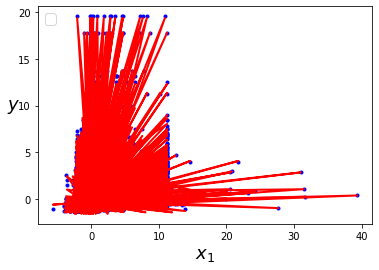

In [76]:
X_new_poly = poly_features.transform(X_train_scaled)
y_pred = lin_reg.predict(X_new_poly)
plt.plot(X_train_scaled, y_train_scaled, "b.")
plt.plot(X_train_scaled, y_pred, "r-", linewidth=2)#, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [77]:
np.round(lin_reg.coef_,2), lin_reg.intercept_

(array([[ 3.37241642e+08, -4.00000000e-01,  8.00000000e-02,
          5.30000000e-01,  2.20000000e-01, -0.00000000e+00,
          5.80000000e-01, -4.60000000e-01,  1.10000000e-01,
         -1.80000000e-01,  4.90000000e-01, -6.10000000e-01,
         -2.64700000e+01, -1.70000000e-01,  7.50000000e-01,
         -1.00000000e-02,  1.00000000e-02,  1.00000000e-02,
         -1.00000000e-02,  4.00000000e-02,  3.75748761e+09,
          1.00000000e-02,  0.00000000e+00, -1.00000000e-02,
          1.00000000e-02, -0.00000000e+00, -6.00000000e-02,
          7.60000000e-01,  0.00000000e+00,  7.00000000e-02,
         -1.00000000e-02,  2.00000000e-02, -4.00000000e-02,
         -2.00000000e-02,  3.00000000e-02, -1.00000000e-02,
          1.00000000e-02,  3.00000000e-02,  3.00000000e-02,
         -1.00000000e-02,  2.00000000e-02, -2.08000000e+00,
         -3.00000000e-02, -1.00000000e-02, -3.00000000e-02,
          4.00000000e-02, -3.00000000e-02, -0.00000000e+00,
         -2.00000000e-02,  1.00000000e-0

In [78]:
lin_reg.coef_.shape

(1, 815)

The model estimates:

$\hat{y} = -0.02X^{814} -0.02X^{813} + -0.03X^{812}, ... , + 0.08X^3 -  0.4X^2 + 3.37x10^8X - 6.35$

In [79]:
from sklearn import metrics
from sklearn.metrics import r2_score

nombre_polinomial, resultado_polinomial = list(), list()
nombre_polinomial.append('MAE')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train_scaled, y_pred))
resultado_polinomial.append(metrics.mean_absolute_error(y_train_scaled, y_pred))
nombre_polinomial.append('Root Mean Squared Error:')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_scaled, y_pred)))
resultado_polinomial.append(np.sqrt(metrics.mean_squared_error(y_train_scaled, y_pred)))
nombre_polinomial.append('r2_score')
print('r2_score',r2_score(y_train_scaled, y_pred))
resultado_polinomial.append(r2_score(y_train_scaled, y_pred))

Error medio Absoluto (MAE): 0.3113581952596882
Root Mean Squared Error: 0.44679311151851003
r2_score 0.8003759154996082


### Ridge Regression or L<sub>2</sub> Regularization

It is important to **scale** the data before performing Ridge Regression:

In [80]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                  #("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 0.0001, solver = 'cholesky', random_state = 42))])
model_ridge.fit(X_train_scaled, y_train_scaled)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ridge',
                 Ridge(alpha=0.0001, random_state=42, solver='cholesky'))])

In [81]:
y_pred = model_ridge.predict(X_train_scaled)

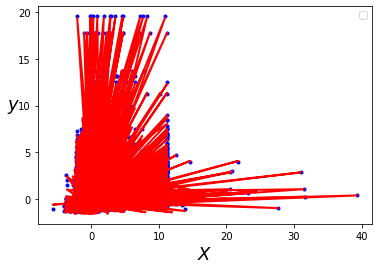

In [82]:
plt.plot(X_train_scaled, y_train_scaled, "b.")
plt.plot(X_train_scaled, y_pred, "r-", linewidth=2)#, label="Predictions w/o Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

Obtener ecuacion

In [83]:
np.round(model_ridge["ridge"].coef_,2), model_ridge["ridge"].intercept_


(array([[ 0.17, -0.39,  0.07,  0.52,  0.23,  0.  ,  0.58, -0.48,  0.13,
         -0.19,  0.49, -0.59, -9.48, -0.17,  0.76, -0.01,  0.01,  0.01,
         -0.01,  0.04, -0.02,  0.01,  0.  , -0.01,  0.01, -0.  , -0.06,
          0.78,  0.  ,  0.07, -0.01,  0.02, -0.04, -0.02,  0.03, -0.01,
          0.01,  0.03,  0.03, -0.01,  0.02, -2.03, -0.03, -0.01, -0.03,
          0.04, -0.03, -0.  , -0.02,  0.01,  0.07, -0.03,  0.01,  0.05,
         -0.12,  0.04, -0.06,  0.01, -0.03, -0.04, -0.05, -0.04, -0.03,
          0.05, -0.01,  0.06,  2.67, -0.08,  0.04,  0.09, -0.02,  0.04,
          0.03,  0.  , -0.03, -0.  ,  0.02,  0.73, -0.02, -0.02,  0.  ,
         -0.06,  0.04, -0.02,  0.02, -0.04,  0.05,  0.85,  0.02, -0.07,
         -0.11,  0.04,  0.02, -0.02,  0.  ,  0.04,  1.93,  0.  ,  0.06,
         -0.  , -0.  ,  0.01,  0.01, -0.06, -2.35,  0.03,  0.04,  0.02,
          0.08, -0.01, -0.07, -0.69, -0.02, -0.12, -0.05,  0.01,  0.02,
         -1.11,  0.05, -0.02, -0.02,  0.06,  1.82, -0.02, -0.08,

In [84]:
model_ridge["ridge"].coef_.shape

(1, 815)

The model estimates:

$\hat{y} = -0.02X^{814} + -0.02X^{813}, ... , + 0.07X^3 - 0.39X^2 + 0.17X -2.36$  

In [85]:
nombre_polinomial_ridge, resultado_polinomial_ridge = list(), list()
nombre_polinomial_ridge.append('MAE')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train_scaled, y_pred))
resultado_polinomial_ridge.append(metrics.mean_absolute_error(y_train_scaled, y_pred))
nombre_polinomial_ridge.append('Root Mean Squared Error:')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_scaled, y_pred)))
resultado_polinomial_ridge.append(np.sqrt(metrics.mean_squared_error(y_train_scaled, y_pred)))
nombre_polinomial_ridge.append('r2_score')
print('r2_score',r2_score(y_train_scaled, y_pred))
resultado_polinomial_ridge.append(r2_score(y_train_scaled, y_pred))

Error medio Absoluto (MAE): 0.31135690174193137
Root Mean Squared Error: 0.44679430649395663
r2_score 0.8003748476845842


### Lasso Regression  or L<sub>1</sub> Regularization 

In [86]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                        #("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 0.06, random_state = 15))])
model_lasso.fit(X_train_scaled, y_train_scaled)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('lasso', Lasso(alpha=0.06, random_state=15))])

In [87]:
y_pred = model_lasso.predict(X_train_scaled)

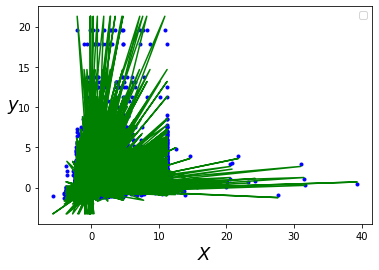

In [88]:
plt.plot(X_train_scaled, y_train_scaled, "b.")
plt.plot(X_train_scaled, y_pred, "g-")#,label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

Obtener ecuacion

In [89]:
model_lasso["lasso"].coef_.shape

(815,)

In [90]:
model_lasso["lasso"].coef_ , model_lasso["lasso"].intercept_

(array([ 0.00000000e+00,  0.00000000e+00,  1.58845176e-01, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.84231825e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  4.66306056e-03, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         3.26526013e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.0

The model estimates:

$\hat{y} = -2.52x10^{-4}X^{814} + 4.81x10^{-3}X^{812}+, ... ,+ 0.158X^3 - 0.16$

In [91]:
nombre_polinomial_lasso, resultado_polinomial_lasso = list(), list()
nombre_polinomial_lasso.append('MAE')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train_scaled, y_pred))
resultado_polinomial_lasso.append(metrics.mean_absolute_error(y_train_scaled, y_pred))
nombre_polinomial_lasso.append('Root Mean Squared Error:')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_scaled, y_pred)))
resultado_polinomial_lasso.append(np.sqrt(metrics.mean_squared_error(y_train_scaled, y_pred)))
nombre_polinomial_lasso.append('r2_score')
print('r2_score',r2_score(y_train_scaled, y_pred))
resultado_polinomial_lasso.append(r2_score(y_train_scaled, y_pred))

Error medio Absoluto (MAE): 0.3648761708484074
Root Mean Squared Error: 0.5378093682627385
r2_score 0.7107610834088339


## Grafica de los errores

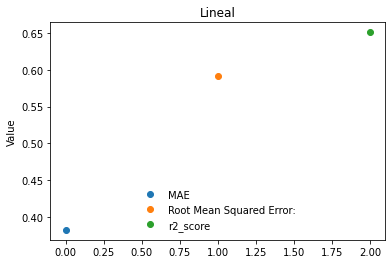

In [92]:
fig, ax = plt.subplots()
plt.title('Lineal');
plt.ylabel('Value')
for i in range(len(resultado_lineal)):
  ax.plot(i,resultado_lineal[i], 'o', label=nombre_lineal[i])
  leg = ax.legend();
  ax.legend(loc='lower center', frameon=False)

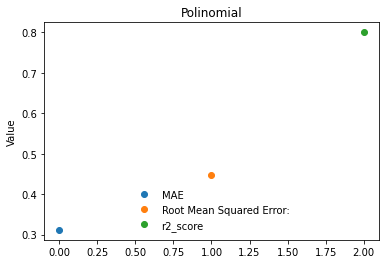

In [93]:
fig, ax = plt.subplots()
plt.ylabel('Value')
plt.title('Polinomial');
for i in range(len(resultado_polinomial)):
  ax.plot(i,resultado_polinomial[i], 'o', label=nombre_polinomial[i])
  leg = ax.legend();
  ax.legend(loc='lower center', frameon=False)

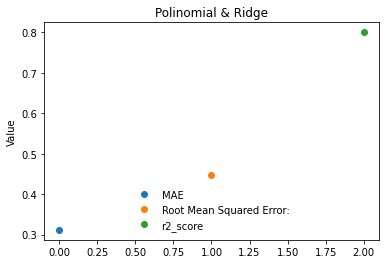

In [94]:
fig, ax = plt.subplots()
plt.title('Polinomial & Ridge');
plt.ylabel('Value')
for i in range(len(resultado_polinomial_ridge)):
  ax.plot(i,resultado_polinomial_ridge[i], 'o', label=nombre_polinomial_ridge[i])
  leg = ax.legend();
  ax.legend(loc='lower center', frameon=False)

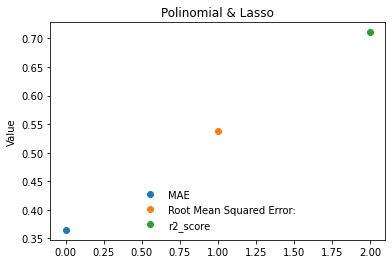

In [95]:
fig, ax = plt.subplots()
plt.ylabel('Value')
plt.title('Polinomial & Lasso');
for i in range(len(resultado_polinomial_lasso)):
  ax.plot(i,resultado_polinomial_lasso[i], 'o', label=nombre_polinomial_lasso[i])
  leg = ax.legend();
  ax.legend(loc='lower center', frameon=False)

##Explica tus resultados

* Que método conviene más a la empresa, ¿por que?, 
  * R. El metodo minimo que le conviene mejor a la empresa es el polinomial y si requiere mejorar el modelo seria el metodo polinomial con Ridge, porque al realizar los ejercicios anteriores el MAE $R^2$, se aprecia que el error es menor a los anteriores metodos con la observacion que el Lasso tiene sus hiperparametros que se requiere modificar para mejorar el modelo
* ¿que porcentajes de entrenamiento y evaluación usaste?, 
  * Utilice el 80% de entrenamiento y 20% de evaluacion porqur influia en el error obtenido
* ¿que error tienes?
  * El error que tengo cambia dependiendo si se ocupa todo el dataframe o solo el data training, siguiendo las buenas practicas se debe ocupar el training para entrenar el modelo y el restante para saber el score de la prediccion del modelo, el error RMS es mas bajo junto con el MAE, mientras que el $R^2$ es el mas alto, con el metodo polinomial el 
     * Error medio Absoluto (MAE): 0.3113581952596882
     * Root Mean Squared Error: 0.44679311151851003
     * r2_score 0.8003759154996082
  * Esto con un grado de 3, al agregar Lasso se obtiene MAE y RME un poco mas alto pero un r2_score 0.7107610834088339, con Ridge se tiene casi similar      
     * Error medio Absoluto (MAE): 0.31135690174193137
     * Root Mean Squared Error: 0.44679430649395663
     * r2_score 0.8003748476845842
* ¿es bueno?
    * Con el metodo polinomial se obtiene un buen modelo porque los erorres son menores con un grado 3, y es aceptable, mientras que con los metodos de regularizacion la diferencia es minima 
* ¿cómo lo sabes?
    * Porque se cambio la escala de los data frames de entrenamiento para apreciar mejor los resultados,al realizar varias combinaciones el error es de los mas bajos con el grado 3, ademas que al añadir los metodos de Regularizacion no tiene una gran diferencia, la diferencia se nota en los coeficientes de la ecuacion y el intercept

## Conclusiones

En esta actividad puedo concuir que:
* Al tener una base de datos con una sola variable el MAE, RMS son altos y al aplicar los metodos de regularizacion, los resultdos no cambian mucho, pero r2_score disminuye porque es un coeficiente para saber que tan cerca estan los datos.
* El intercept con una sola variable se mantiene
* Las graficas se aprecian que son lineas, esto es debido a que la regresion lineal intenta hacer el mejor hiperplano con su recta normal para hacer la clasificacion, por ello se aprecian varia lineas
* Se parecia que el metodo Lasso castiga mas los pesos ya que varios los puede convertir a cero, lo que incrementa que baje la varianza para mejorar el r2_score pero los errores RMS y MAE, incrementan ligeramente
* Cuando se tiene mas de una variable, para apreciar mejor los resultados debemos escalarlos
* Los errores MAE Y RMS son mas bajos en comparacion al r2_score, esto se entiende porque los errores dependen de el volumen del data frame, mientras que el r2_score aumenta hay mas datos juntos por aumentar las variable
* Con este numero de variable se aprecia que el algoritmo de PCA puede ser ocupado para crear menores componentes para tener una varianza mayor al 70%, mejorar el analisis
* El mejor metodo es el polinomial ya que agrega complejidad al modelo, mientras que los metodos de regularizacion, depende mas de sus hiperparametros para mejorar el modelo, por lo que realizar un GridSearch es una buena estrategia a implementar